## Finding the Best Markets to Advertise In

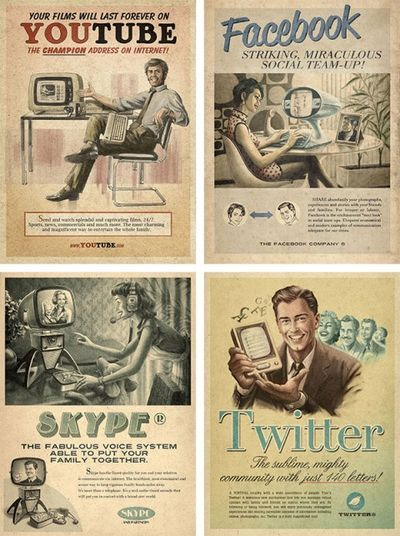

## Introduction



The goal of this work - analyzing data of  <a href="https://www.freecodecamp.org/news/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb/" target="_blank">freeCodeCamp's 2017 New Coder Survey </a>, you can download this dataset  <a href="https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data" target="_blank"> here </a>, for defining the most promising regional markets for advertising  programming courses for  the e-learning company. 

<a href="https://www.freecodecamp.org/news/" target="_blank"> FreeCodeCamp </a> is a free e-learning platform that offers courses on web development and other IT disciplines like programming on other languages, Data Analyst, Machine Leaning, DevOps and etc . Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. 

According to the founder of FreeCodeCamp Quincy Larson in the <a href="https://twitter.com/ossia/status/1039182400625041408" target="_blank">Sep 10, 2018  </a> each week learners have solved more than 2,500,000 interactive coding challenges - that is, the total number of unique users was at least 2.5 million.

Dataset hasn't any any explanatory  dictionary so I have to guess everything myrself.


##  Understanding the Data

Load dataset and collect general information:

In [1]:
# import required library
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display american abbreviation for numbers
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

# Open dataset
fcc = pd.read_csv("data/2017-fCC-New-Coders-Survey-Data.csv")
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.000,0.000,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.000,0.000,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.000,0.000,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.000,1.000,NaN,NaN,NaN,NaN,NaN
3,26.000,0.000,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.000,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
4,20.000,0.000,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


I see that head of  dataset contains many NaN values. 
viewing 136 columns of 18k values is just a waste of time. Let us estimate the data density using seaborn heatmap plot

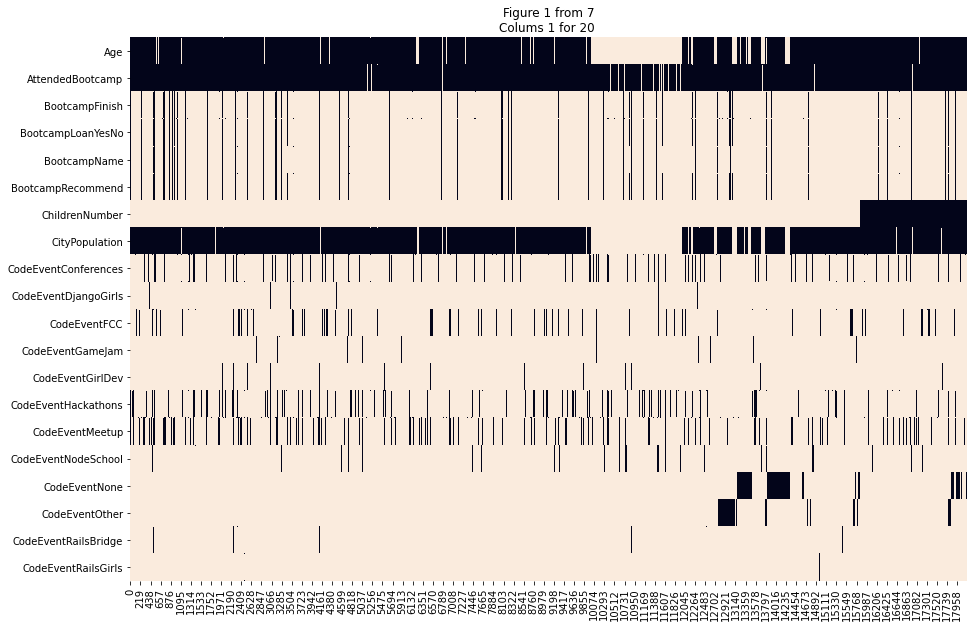

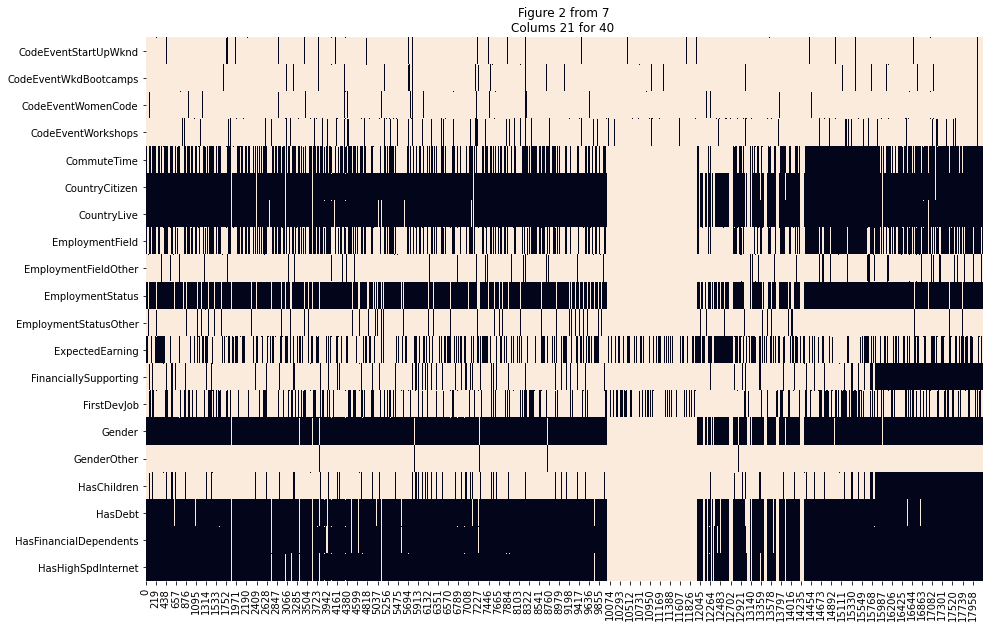

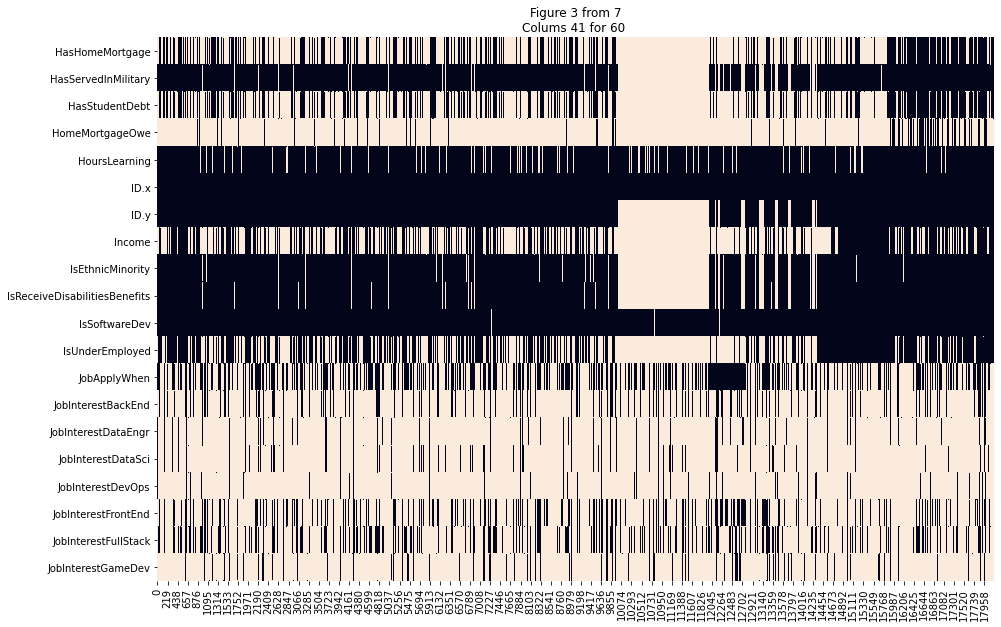

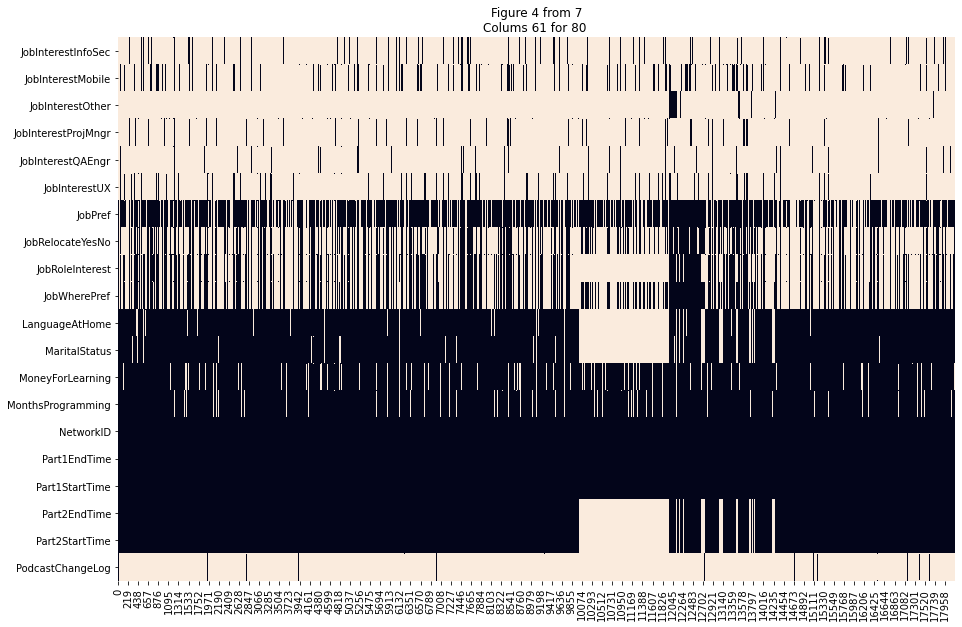

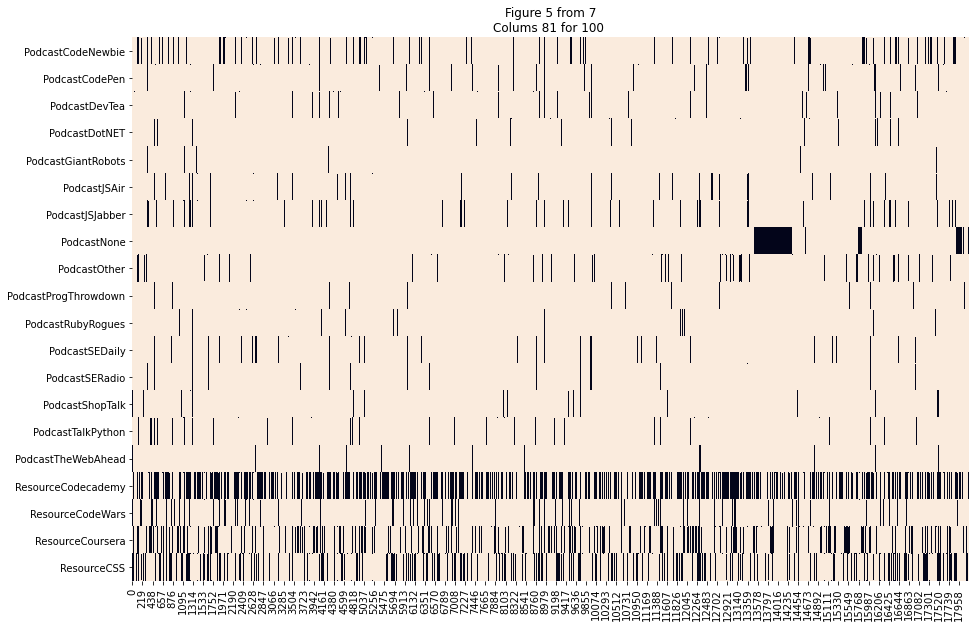

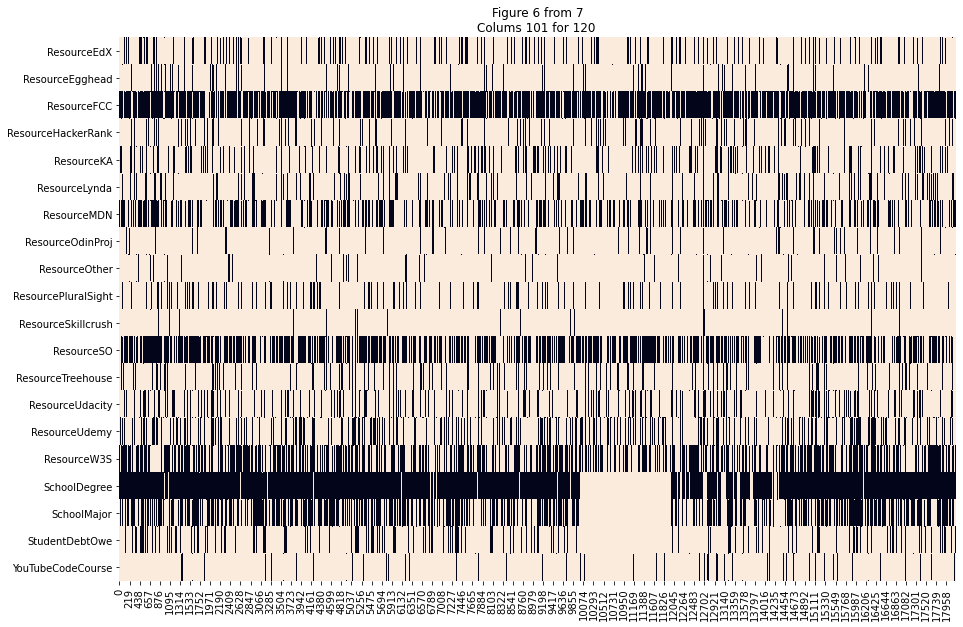

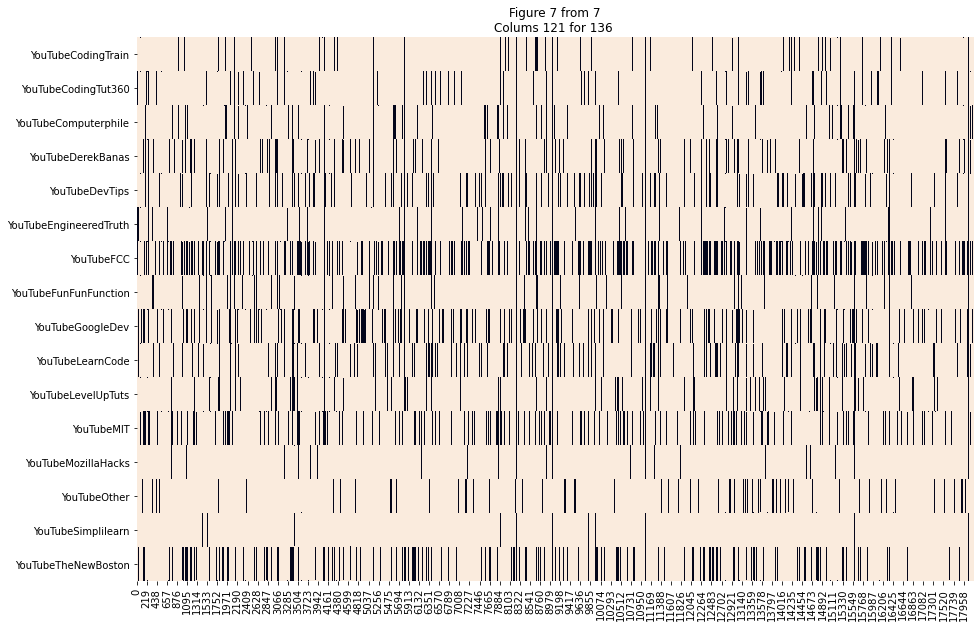

In [3]:
# Define columns
columns = [x for x in range(len(list(fcc.columns)))]
# Define number columns of each plot
col_in_plot = 20
# Define number of plots
plot_rows = divmod(len(columns), col_in_plot)
start_column = []
end_column = []
for i in range(plot_rows[0]):
    start_column.append(i * col_in_plot )
    end_column.append((i +1) * col_in_plot )
if plot_rows[1]:
    start_column.append(end_column[-1])
    end_column.append(end_column[-1] + plot_rows[1])
plot_rows = len(start_column) 
# Print seaborn heatmap
for i, (x,y) in enumerate(zip(start_column, end_column)):
    fig, ax = plt.subplots(figsize=(15,10))  
    sns.heatmap(fcc.iloc[:, x:y].isnull().T, cbar = False, ax = ax)
    plt.title(f"Figure {i+1} from {plot_rows}\
\nColums {x+1} for {y} ")
    plt.show()

Before continuing further work, a small remark about the representativeness of the fcc dataset - to obtain statistically representative sample require that the size of  sample  was not less than 3 - 5%  or 75 000 (3% from 2.5M of student FreeCodecamp). Hence fcc dataset isn't statistically representative.

I see that many columns contain many NaN values. 

##  Checking for Sample Representativity

### Defining countries live  of new coders:

In [4]:
# Group country live and count values for each country
fcc_country = fcc.groupby(["CountryLive"])["CountryLive"].agg('count')

# Extract requred data to list from series
countries = list(fcc_country.index)
values = list(fcc_country.values)

#Create dataframe from lists
fcc_country = pd.DataFrame({"country": countries, "coders": values})
# Sort coders columns
fcc_country = fcc_country.sort_values("coders", ascending = False)
# Add new columns with total share in %
fcc_country["coders_share_%"] = 100 * fcc_country.coders\
            /fcc_country.coders.sum()
# Reset index
fcc_country.reset_index(drop=True, inplace = True)
fcc_country.head(12)

,country,coders,coders_share_%
0,United States of America,5791,37.761
1,India,1400,9.129
2,United Kingdom,757,4.936
3,Canada,616,4.017
4,Brazil,364,2.374
5,Germany,324,2.113
6,Poland,265,1.728
7,Russia,263,1.715
8,Australia,259,1.689
9,France,228,1.487


In [5]:
fcc_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         172 non-null    object 
 1   coders          172 non-null    int64  
 2   coders_share_%  172 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [6]:
fcc_country.coders.sum()

15336

It seen that from 18 175 coders only 15 336 or 84.37%  designate their 172 countries. 

### Defining  citizen country  of new coders:

In [7]:
# Group country citizen and count values for each country
fcc_citizen = fcc.groupby(["CountryCitizen"])["CountryCitizen"].agg('count')

# Extract requred data to list from series
citizen = list(fcc_citizen.index)
values = list(fcc_citizen.values)

#Create dataframe from lists
fcc_citizen = pd.DataFrame({"citizen": citizen, "coders": values})
# Sort coders columns
fcc_citizen = fcc_citizen.sort_values("coders", ascending = False)
# Add new columns with total share in %
fcc_citizen["coders_share_%"] = 100 * fcc_citizen.coders\
            /fcc_citizen.coders.sum()
# Reset index
fcc_citizen.reset_index(drop=True, inplace = True)
fcc_citizen.head(12)

,citizen,coders,coders_share_%
0,United States of America,5480,35.626
1,India,1594,10.363
2,United Kingdom,640,4.161
3,Canada,564,3.667
4,Brazil,399,2.594
5,Poland,297,1.931
6,Russia,294,1.911
7,Germany,251,1.632
8,Ukraine,246,1.599
9,France,245,1.593


It seem  from this table and table above - some coders  live in countries of which they are not citizens.

### Define the size of cites of new coders 

In [8]:
fcc_population = fcc.groupby(["CityPopulation"])["CityPopulation"].agg('count')

# Extract requred data to list from series
population = list(fcc_population.index)
values = list(fcc_population.values)

#Create dataframe from lists
fcc_population = pd.DataFrame({"city_population": population, "coders": values})
# Sort coders columns
fcc_population = fcc_population.sort_values("coders", ascending = False)
# Add new columns with total share in %
fcc_population["coders_share_%"] = 100 * fcc_population.coders\
            /fcc_population.coders.sum()
# Reset index
fcc_population.reset_index(drop=True, inplace = True)
fcc_population.head()

,city_population,coders,coders_share_%
0,more than 1 million,6534,42.556
1,"between 100,000 and 1 million",5276,34.362
2,"less than 100,000",3544,23.082


It seem that the most of coders live in cities over 100 K population.

##  Financial assessment of coders

In [9]:
# Collect financical information
"""
for columns "CountryLive", "HasDebt", "HasStudentDebt", "HasFinancialDependents", 
"HasHomeMortgage" use sum, for "HomeMortgageOwe" - count
"""
fcc_debt = fcc.groupby(["CountryLive"]).agg(
    {"CountryLive": "count",
     "HasDebt": "sum", 
     "HasStudentDebt": "sum",
     "HasFinancialDependents": "sum", 
     "HasHomeMortgage": "sum" ,
     "HomeMortgageOwe":"count",
     })
# Rename columns
fcc_debt.columns = [ "coders", "debt", "student_debt",
                    "dependence", "home_mortage", "home_mortage_owe"]

# Sort by debt
fcc_debt = fcc_debt.sort_values("debt", ascending=False)
# Reset index
fcc_debt.reset_index(inplace=True)
#convert float 64 to int
fcc_debt[["debt", "student_debt", "dependence", "home_mortage"]] = \
fcc_debt[["debt", "student_debt", "dependence", "home_mortage"]].astype(int)
fcc_debt.head(12)

,CountryLive,coders,debt,student_debt,dependence,home_mortage,home_mortage_owe
0,United States of America,5791,3592,2430,1491,964,806
1,United Kingdom,757,360,228,158,89,61
2,Canada,616,295,189,112,75,62
3,India,1400,287,127,350,90,54
4,Australia,259,124,76,54,50,43
5,Brazil,364,109,25,94,19,11
6,Germany,324,73,43,54,9,5
7,"Netherlands (Holland, Europe)",142,65,46,28,17,14
8,South Africa,126,64,20,48,14,9
9,Poland,265,62,10,56,30,23


It seem that most of coders in countries with highest GDP have debts in one or another forms

## Defining age of coders

Create plots for age dispersion using seaborn displot: 

<Figure size 432x288 with 0 Axes>

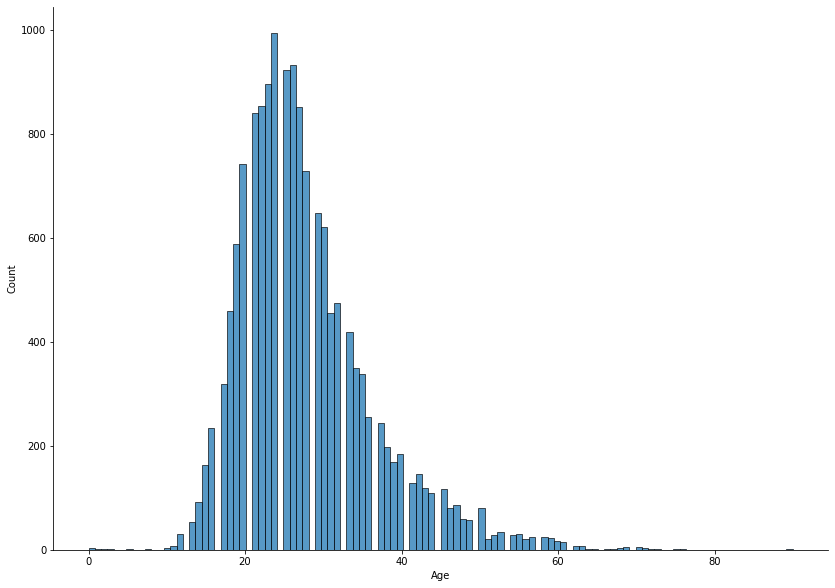

In [10]:
plt.figure()
ax = sns.displot(data = fcc, x = fcc.Age, kind="hist", height=8.27, aspect=11.7/8.27)
plt.show()

<Figure size 432x288 with 0 Axes>

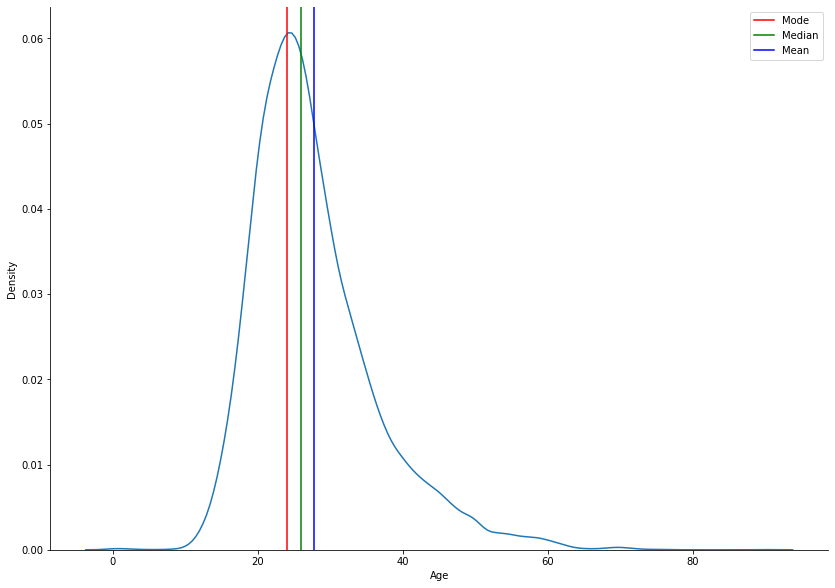

In [11]:
plt.figure()
ax = sns.displot(data = fcc, x = fcc.Age, kind="kde", height=8.27, aspect=11.7/8.27)
mode = fcc.Age.value_counts().index[0]
mode_val = fcc.Age.value_counts().values[0]
median = fcc.Age.median()
mean = fcc.Age.mean()
plt.axvline(x = mode, linewidth=1.5, color='r', label="Mode")
plt.axvline(x = median, linewidth=1.5, color='g', label = "Median")
plt.axvline(x = mean, linewidth=1.5, color='b', label="Mean")
plt.legend()
plt.show()

In [12]:
print("Year mode:", mode,", mode value: ", mode_val, "\nYear median: ", median,\
      "\nYear mean: {:.2f} ".format(mean) )

Year mode: 24.0 , mode value:  994 
Year median:  26.0 
Year mean: 27.69 


## Define most popular job role interest

In [13]:
fcc_jobs = fcc.groupby(["JobRoleInterest"])["JobRoleInterest"].agg('count')

# Extract requred data to list from series
jobs = list(fcc_jobs.index)
values = list(fcc_jobs.values)

#Create dataframe from lists
fcc_jobs = pd.DataFrame({"new_jobs": jobs, "coders": values})
# Sort coders columns
fcc_jobs = fcc_jobs.sort_values("coders", ascending = False)
# Add new columns with total share in %
fcc_jobs["coders_share_%"] = 100 * fcc_jobs.coders\
            /fcc_jobs.coders.sum()
# Reset index
fcc_jobs.reset_index(drop=True, inplace = True)
fcc_jobs.head(10).round(3)

,new_jobs,coders,coders_share_%
0,Full-Stack Web Developer,823,11.771
1,Front-End Web Developer,450,6.436
2,Data Scientist,152,2.174
3,Back-End Web Developer,142,2.031
4,Mobile Developer,117,1.673
5,Game Developer,114,1.630
6,Information Security,92,1.316
7,"Full-Stack Web Developer, Front-End Web Deve...",64,915.000m
8,"Front-End Web Developer, Full-Stack Web Deve...",56,801.000m
9,Product Manager,55,787.000m


## Define gender ratio

In [14]:
# Collect gender data
fcc_gender = fcc.groupby(["CountryLive","Gender"]).agg(
    {"Gender": "count"})
# Rename column
fcc_gender.columns = ["gen_number"]
# Reset index
fcc_gender.reset_index(inplace=True)
# Add male  and female columns
fcc_gender["male"] = np.where(fcc_gender.Gender == "male", fcc_gender.gen_number,0)
fcc_gender["female"] = np.where(fcc_gender.Gender == "female", fcc_gender.gen_number,0)
# Drop columns Gender and gen)number
fcc_gender.drop(columns=["Gender", 'gen_number'], inplace=True)
# group, sorting and reset index
fcc_gender = fcc_gender.groupby(["CountryLive"])["male","female"].\
    agg("sum").reset_index().sort_values("male", ascending = False)
fcc_gender.reset_index(drop = True, inplace = True)
fcc_gender.head(12)

,CountryLive,male,female
0,United States of America,4129,1499
1,India,1255,137
2,United Kingdom,594,145
3,Canada,468,137
4,Brazil,319,42
5,Germany,270,46
6,Poland,222,42
7,Russia,219,39
8,Australia,204,52
9,Nigeria,192,21


It seen that most of coders are male.


### Conclusion for representative sample

See information above I can the following conclusions:
* The most of new coders of FreeCodeCamp are people from North America, Europe and India between the ages of 20 and 40 and who have loans in any form.

* The main goal of these people is to get a demanded and highly paid job for possible getting finance independence.

* A sufficient number of citizen from India is due to the fact that in India there is a very large number of people who do not have a language barrier to English. Interestingly, China did not make it to the top ten countries.

## Define spending money for learning and most popular market.
Create new dataset and check its data for accuracy:

In [15]:
# define required columns
fcc_spent = fcc[["CountryLive", "MoneyForLearning", "MonthsProgramming"]]
# fill zero NaN  values for MoneyForLearning and 1 for MonthsProgramming column
values = {"MoneyForLearning": 0, "MonthsProgramming": 1}
fcc_spent = fcc_spent.copy().fillna(value = values)
# Drop nan values from CountryLive column
fcc_spent = fcc_spent.copy().dropna()
# Replace zero to one for avoiding divide by zero
fcc_spent.MonthsProgramming.replace(to_replace = 0, value = 1, inplace = True)
# Add new column
fcc_spent["spent_monthly"] = round(fcc.MoneyForLearning / fcc.MonthsProgramming, 2)
# Drop nan values from spent_monthly column
fcc_spent = fcc_spent.copy().dropna()
# Remain only non zero values in spent_monthly column
fcc_spent = fcc_spent[fcc_spent.spent_monthly > 0]
#drop infinity values
fcc_spent = fcc_spent[~fcc_spent.isin([np.inf, -np.inf]).any(1)]
# Sort by spent_money and reset index
fcc_spent = fcc_spent.sort_values("spent_monthly", ascending=False)
fcc_spent.head(12)

,CountryLive,MoneyForLearning,MonthsProgramming,spent_monthly
14024,United States of America,80.000k,1.000,80.000k
17093,United States of America,60.000k,1.000,60.000k
2478,United States of America,100.000k,2.000,50.000k
1393,United States of America,90.000k,2.000,45.000k
6835,Spain,40.000k,1.000,40.000k
16436,United States of America,25.000k,1.000,25.000k
712,Australia,20.000k,1.000,20.000k
6529,Russia,40.000k,2.000,20.000k
16650,United States of America,200.000k,12.000,16.667k
17231,United States of America,30.000k,2.000,15.000k


I see huge amounts of fees per month that are higher than the cost of the full path certification for  the Cisco highest level system network engineer from nub - there are inaccuracy data. Therefore, recall the rule for determining the reliable interval 1.5 IQR. Analyze dispersion for `fcc_spent.spent_monthly` columns.

In [16]:
fcc_spent.spent_monthly.describe()

count     7.292k
mean     243.051
std       1.714k
min      20.000m
25%        6.250
50%       20.830
75%      100.000
max      80.000k
Name: spent_monthly, dtype: float64

Hence low limit = min = 20.000m (actual for Africa) , high limit =  100 * 1.5 * 1,714 = 2,671.
Correct our dataset:

In [17]:
fcc_spent = fcc_spent[(fcc_spent.spent_monthly >= 0.02) &\
                      (fcc_spent.spent_monthly <= 2671.0)]
fcc_spent = fcc_spent.sort_values("spent_monthly", ascending=False)
fcc_spent.reset_index(drop = True, inplace = True)
fcc_spent.head(12)

,CountryLive,MoneyForLearning,MonthsProgramming,spent_monthly
0,United States of America,16.000k,6.000,2.667k
1,United States of America,8.000k,3.000,2.667k
2,United States of America,16.000k,6.000,2.667k
3,United States of America,36.000k,14.000,2.571k
4,Turkey,7.560k,3.000,2.520k
5,United States of America,20.000k,8.000,2.500k
6,United States of America,10.000k,4.000,2.500k
7,United States of America,20.000k,8.000,2.500k
8,United States of America,30.000k,12.000,2.500k
9,Israel,5.000k,2.000,2.500k


In [18]:
fcc_spent.describe()

,MoneyForLearning,MonthsProgramming,spent_monthly
count,7.207k,7.207k,7.207k
mean,1.504k,23.933,137.616
std,3.863k,45.532,328.481
min,1.000,1.000,20.000m
25%,98.000,5.000,6.250
50%,200.000,12.000,20.830
75%,900.000,24.000,83.330
max,69.000k,744.000,2.667k


In [19]:
fcc_spent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7207 entries, 0 to 7206
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CountryLive        7207 non-null   object 
 1   MoneyForLearning   7207 non-null   float64
 2   MonthsProgramming  7207 non-null   float64
 3   spent_monthly      7207 non-null   float64
dtypes: float64(3), object(1)
memory usage: 225.3+ KB


In [20]:
# Estimate month revenue and mean lenght of course by country
fcc_month_revenue = fcc_spent.groupby(["CountryLive"])\
    .agg({"MonthsProgramming":['count', 'mean'], "spent_monthly": ["mean",'sum']})
# Reset multindex
fcc_month_revenue.columns = fcc_month_revenue.columns.droplevel(0)
fcc_month_revenue.reset_index(inplace=True)
# Rename columns
fcc_month_revenue.columns =["country", "students_month", "course_moths_mean",
                            "spent_money_month_mean",
                            "month_revenue"]

# Insert new columns with student share in %
fcc_month_revenue.insert(2, "students_share_%", 
                         round(100 *fcc_month_revenue.students_month\
                               /fcc_month_revenue.students_month.sum(),3))

# Insert new columns with revenue share in %
fcc_month_revenue.insert(6, "month_revenue_share_%", 
                         round(100 *fcc_month_revenue.month_revenue\
                               /fcc_month_revenue.month_revenue.sum(),3))

# sort revenue descending
fcc_month_revenue = fcc_month_revenue.sort_values("month_revenue", 
                                                  ascending=False)
# Reset and drop index
fcc_month_revenue.reset_index(drop = True, inplace = True)
fcc_month_revenue.head(12)

,country,students_month,students_share_%,course_moths_mean,spent_money_month_mean,month_revenue,month_revenue_share_%
0,United States of America,3050,42.320,22.856,187.499,571.873k,57.660
1,Canada,301,4.176,25.907,204.169,61.455k,6.196
2,India,516,7.160,25.401,91.238,47.079k,4.747
3,United Kingdom,365,5.065,23.888,96.962,35.391k,3.568
4,Spain,105,1.457,33.067,254.346,26.706k,2.693
5,Brazil,176,2.442,33.812,76.863,13.528k,1.364
6,France,104,1.443,26.298,104.986,10.919k,1.101
7,Germany,137,1.901,32.796,75.211,10.304k,1.039
8,Poland,128,1.776,19.750,80.133,10.257k,1.034
9,Australia,131,1.818,31.870,72.315,9.473k,955.000m


It seen that dispersion of revenue in moths radically  different than dispersion coders of country live and citizen country. Apart from the United States, where a printing press is permanently work to produce blank strips of cut green paper.

## Visualization spent money on month  for world wide  and most perspective markets

It seen, that most perspective market by month revenue are four country - United States of America, Canada, India and United Kingdom. Due to the large range of values, we will use a logarithmic scale. Plotting barplots pointless, since it will be difficult to see the real distribution due to the large range of values. We plan sell month  subscription at a price of $59 - mark this values in the plots.  	
Create plot for world wide dispersions.

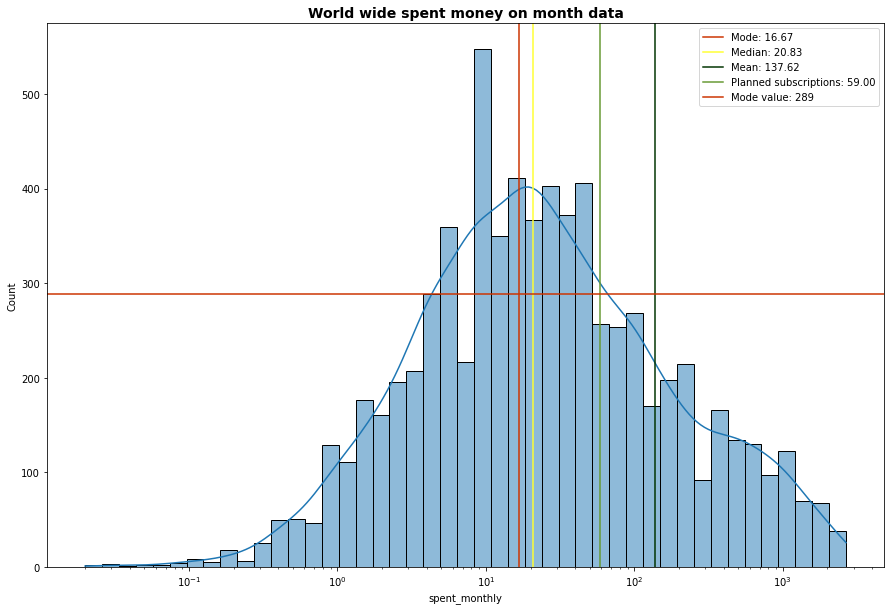

In [21]:
fig, ax = plt.subplots()
ax = sns.histplot(data = fcc_spent, x = fcc_spent.spent_monthly, 
                  kde = True, log_scale=True)
ax.figure.set_size_inches(15, 10)
mode = fcc_spent.spent_monthly.value_counts().index[0]
mode_val = fcc_spent.spent_monthly.value_counts().values[0]
median = fcc_spent.spent_monthly.median()
mean = fcc_spent.spent_monthly.mean()
plt.axvline(x = mode, linewidth=1.5, color='#CC3300', label=f"Mode: {mode:.2f}")
plt.axvline(x = median, linewidth=1.5, color='#FFFF33', label = f"Median: {median:.2f}")
plt.axvline(x = mean, linewidth=1.5, color='#003300', label=f"Mean: {mean:.2f}")
plt.axvline(x = 59.0, linewidth=1.5, color='#669933', label="Planned subscriptions: 59.00")
plt.axhline(y = mode_val, linewidth=1.5, color='#CC3300', label=f"Mode value: {mode_val}")
plt.legend()
plt.title("World wide spent money on month data", fontsize = 14, fontweight = "bold")
plt.show()

It seen that planned price of subscriptions are competing relative mean price.


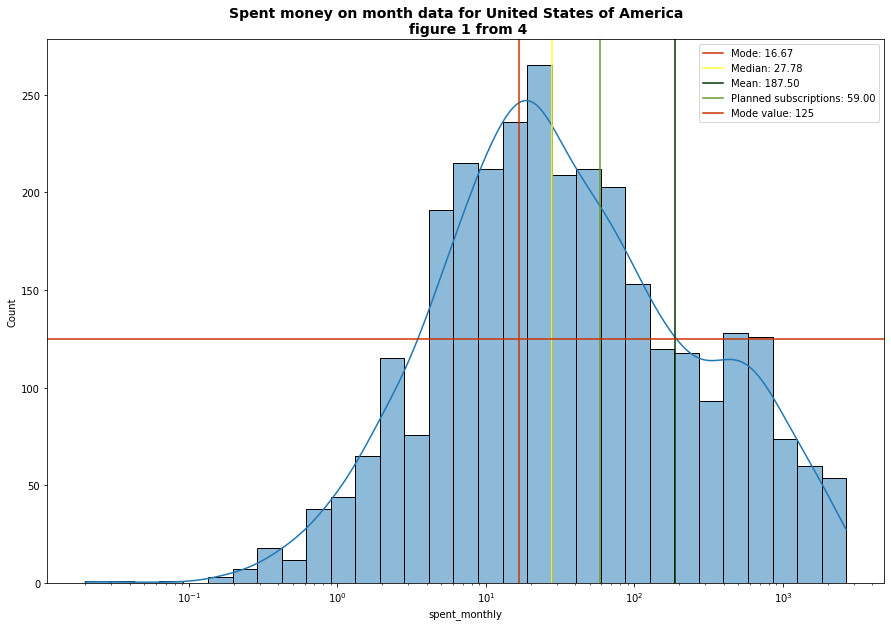

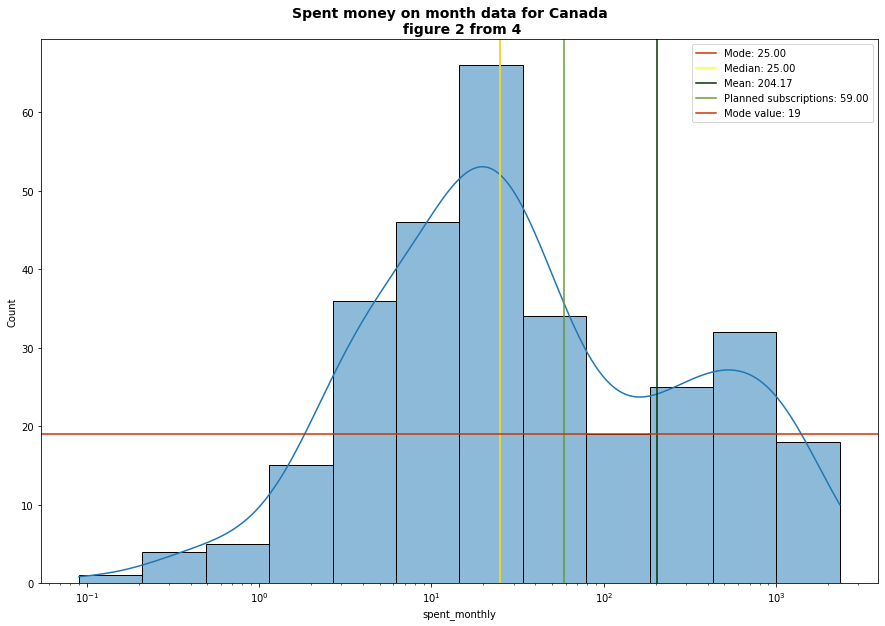

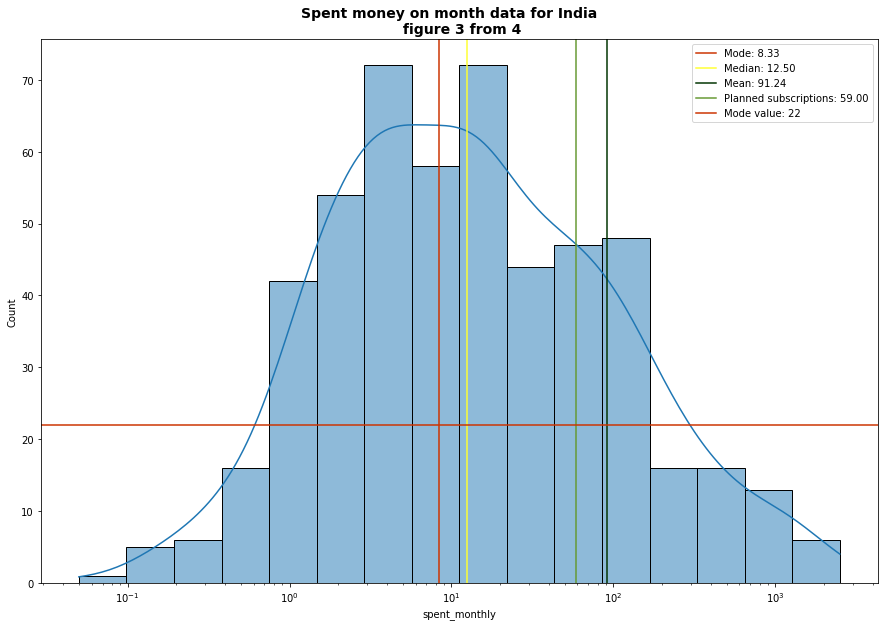

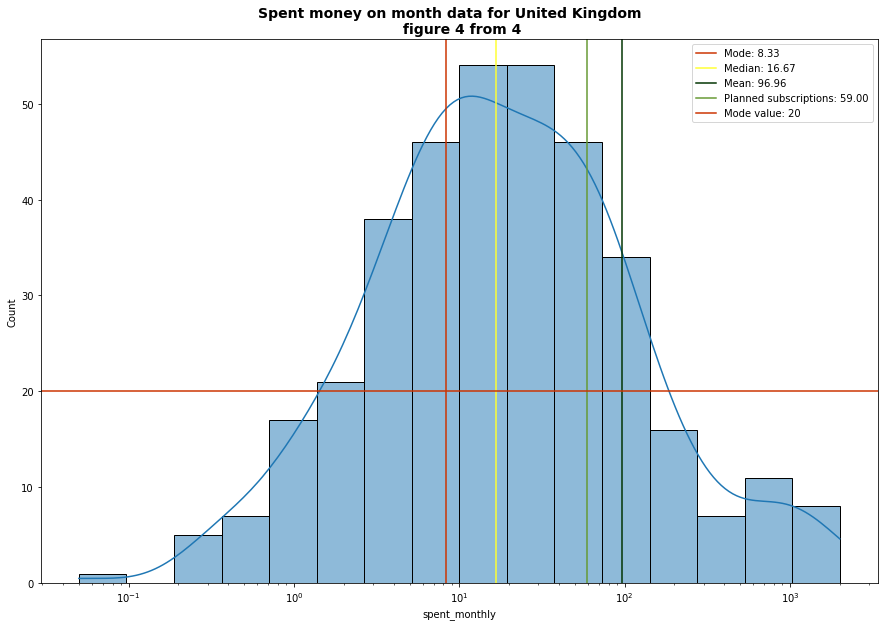

In [22]:
first_market = ["United States of America", "Canada", "India", "United Kingdom"]
for i, country in enumerate (first_market):
    df_spent = fcc_spent[fcc_spent.CountryLive == country].copy()
    df_spent.reset_index(drop = True, inplace = True)
    fig, ax = plt.subplots()
    ax = sns.histplot(data = df_spent, x = df_spent.spent_monthly, 
                  kde = True, log_scale=True)
    ax.figure.set_size_inches(15, 10)
    mode = df_spent.spent_monthly.value_counts().index[0]
    mode_val = df_spent.spent_monthly.value_counts().values[0]
    median = df_spent.spent_monthly.median()
    mean = df_spent.spent_monthly.mean()
    plt.axvline(x = mode, linewidth=1.5, color='#CC3300', label=f"Mode: {mode:.2f}")
    plt.axvline(x = median, linewidth=1.5, color='#FFFF33', label = f"Median: {median:.2f}")
    plt.axvline(x = mean, linewidth=1.5, color='#003300', label=f"Mean: {mean:.2f}")
    plt.axvline(x = 59.0, linewidth=1.5, color='#669933', label="Planned subscriptions: 59.00")
    plt.axhline(y = mode_val, linewidth=1.5, color='#CC3300', label=f"Mode value: {mode_val}")
    plt.legend()
    plt.title(f"Spent money on month data for {country}\
    \n figure {i+1} from {len(first_market)}", fontsize = 14, fontweight = "bold")
    plt.show()
    

## Conclusion

It seen above that the best potential markets (in terms of geography and paying capacity) to promote an e-learning company specialized in programming courses.Geographically, the best market for the advertisement campaign are the United States of America, Canada, India, United Kingdom. 

As possible strategies, I think that possible two alternatives:
* advertising for all four countries -  United States of America, Canada, India, United Kingdom with next proportion - 79.89%, 8.59%, 6.58% and 4.94%  based on the percentage of month revenue estimated data from FreeCodeCamp.
* advertising only in the USA for first time.

* Main target audience is represented by people age  20 -30 years old, mostly male and partially they have finance dependence like student debt, home mortgage and etc.

Final decision take marketing department based of their MDF and general strategy of company.

Created on May 06, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: 

Debian 10

Python 3.8.7

required next imported python modules:

matplotlib

numpy

pandas

seaborn